
*La empresa necesita saber detectar posibles fraudes de tarjetas de credito.*

---

### Conexion Drive

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


### Librerias

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Para los graficos tengan las mismas dimensiones
%matplotlib inline
plt.style.use('ggplot')
#plt.rcParams['figure.figsize'] = (7, 4)

pd.options.display.max_columns = None
sns.set_style('whitegrid')
color = sns.color_palette()

## Rutas

In [4]:
#Repositorios
path = '/gdrive/MyDrive/BQ - Data Science/BQ - Repositorios/Repositorio_Portafolio/'
filename = "fraudeTC.csv"
fullpath = os.path.join(path, filename)

# Lectura de datos

In [5]:
df = pd.read_csv(fullpath)

In [6]:
print(df.shape)
df.head(3)

(1296675, 23)


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0


# Data Wrangling

In [ ]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   cc_num                 1296675 non-null  int64  
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   first                  1296675 non-null  object 
 6   last                   1296675 non-null  object 
 7   gender                 1296675 non-null  object 
 8   street                 1296675 non-null  object 
 9   city                   1296675 non-null  object 
 10  state                  1296675 non-null  object 
 11  zip                    1296675 non-null  int64  
 12  lat                    1296675 non-null  float64
 13  long                   1296675 non-null  float64
 14  city_pop          

Eliminamos columna innecesaria

In [ ]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [ ]:
columnsNoAnalisis = ['trans_date_trans_time','cc_num','merchant','first','last','street','zip','lat','long','job',
                     'dob','trans_num','unix_time','merch_lat','merch_long']
columnsString = ['category','gender','city','state','is_fraud']
columnsNumeric = [x for x in df.columns if x not in columnsString + columnsNoAnalisis]

Revisamos duplicados

In [ ]:
df.duplicated().any()

False

In [ ]:
# Validando registros únicos
print(df.shape)
print(df[columnsString].nunique())

(1296675, 22)
trans_date_trans_time    1274791
merchant                     693
category                      14
last                         481
gender                         2
street                       983
city                         894
state                         51
job                          494
dob                          968
trans_num                1296675
dtype: int64


# **I. Analisis Exploratorio**

In [ ]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
trans_date_trans_time,1296675,1274791,2019-04-22 16:02:01,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cc_num,1296675.0,NaN,NaN,NaN,417192042079726656.0,1308806447000240384.0,60416207185.0,180042946491150.0,3521417320836166.0,4642255475285942.0,4992346398065154048.0
merchant,1296675,693,fraud_Kilback LLC,4403,NaN,NaN,NaN,NaN,NaN,NaN,NaN
category,1296675,14,gas_transport,131659,NaN,NaN,NaN,NaN,NaN,NaN,NaN
amt,1296675.0,NaN,NaN,NaN,70.351035,160.316039,1.0,9.65,47.52,83.14,28948.9
first,1296675,352,Christopher,26669,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,1296675,481,Smith,28794,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,1296675,2,F,709863,NaN,NaN,NaN,NaN,NaN,NaN,NaN
street,1296675,983,0069 Robin Brooks Apt. 695,3123,NaN,NaN,NaN,NaN,NaN,NaN,NaN
city,1296675,894,Birmingham,5617,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Revision Objetivo

Porcentaje de Creditos Aprobados : 0.99
Porcentaje de Creditos Rechazados : 0.01


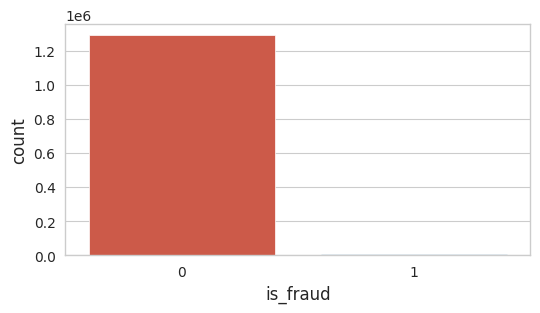

In [ ]:
plt.figure(figsize=(6,3))
sns.countplot(x='is_fraud', data=df);

print('Porcentaje de No Fraudes : %.2f' % (df['is_fraud'].value_counts()[0] / len(df)))
print('Porcentaje de Fraudes : %.2f' % (df['is_fraud'].value_counts()[1] / len(df)))

## Analisis Univariado

### Categoricas

category
entertainment      94014
food_dining        91461
gas_transport     131659
grocery_net        45452
grocery_pos       123638
health_fitness     85879
home              123115
kids_pets         113035
misc_net           63287
misc_pos           79655
personal_care      90758
shopping_net       97543
shopping_pos      116672
travel             40507
dtype: int64


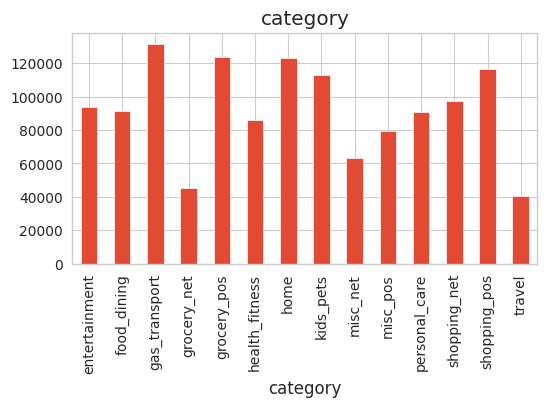

gender
F    709863
M    586812
dtype: int64


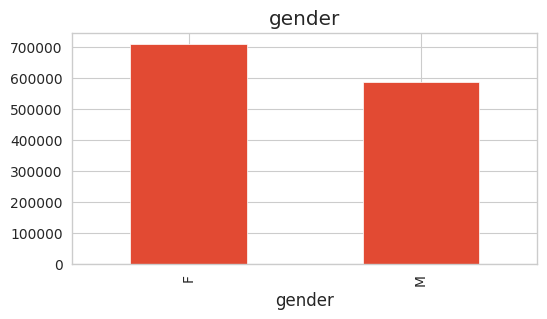

city
Achille                       532
Acworth                      2097
Adams                         516
Afton                        2035
Akron                         511
                             ... 
Woods Cross                   514
Woodville                    2109
Yellowstone National Park     525
Zaleski                      1557
Zavalla                      1537
Length: 894, dtype: int64


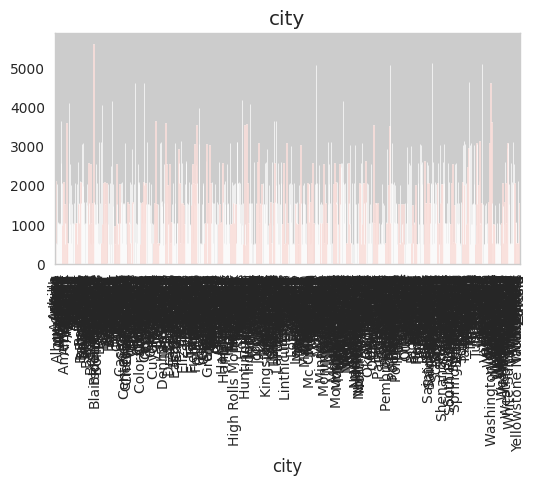

state
AK     2120
AL    40989
AR    31127
AZ    10770
CA    56360
CO    13880
CT     7702
DC     3613
DE        9
FL    42671
GA    26063
HI     2559
IA    26985
ID     5545
IL    43252
IN    27580
KS    22996
KY    28475
LA    20965
MA    12376
MD    26193
ME    16505
MI    46154
MN    31714
MO    38403
MS    21188
MT    11754
NC    30266
ND    14786
NE    24168
NH     8278
NJ    24603
NM    16407
NV     5607
NY    83501
OH    46480
OK    26671
OR    18597
PA    79847
RI      550
SC    29190
SD    12324
TN    17554
TX    94876
UT    10699
VA    29250
VT    11768
WA    18924
WI    29368
WV    25691
WY    19322
dtype: int64


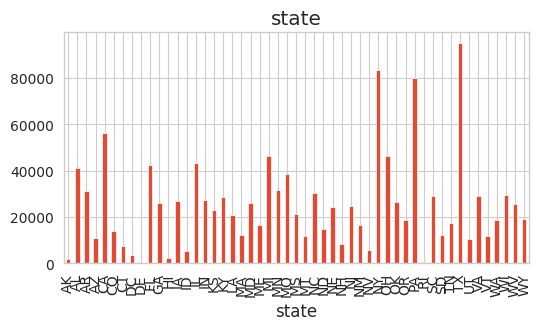

is_fraud
0    1289169
1       7506
dtype: int64


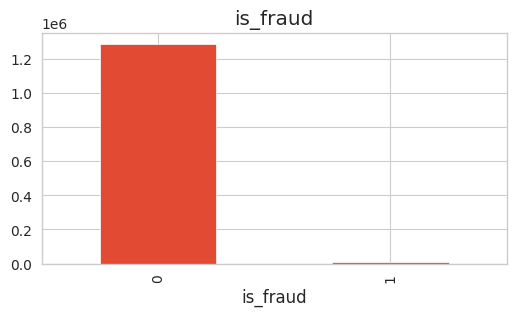

In [ ]:
for x in columnsString:
  plt.figure(figsize=(6,3))
  print(df.groupby(x).size())
  plt.title(x)
  df.fillna("--NULL").groupby(x)[x].count().plot(kind = "bar")
  plt.show()

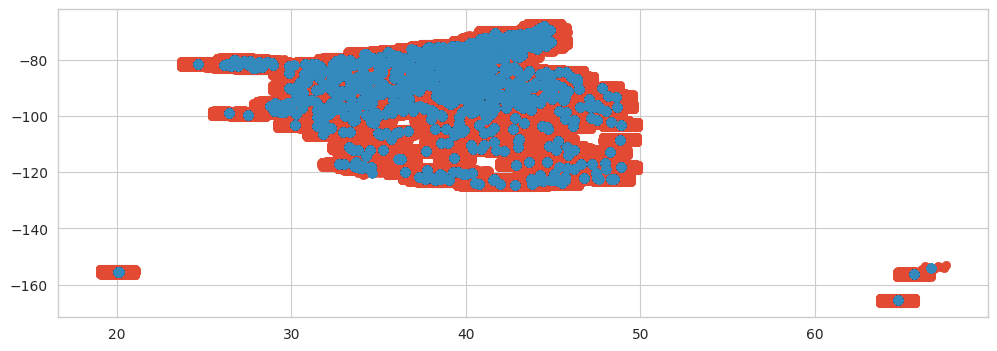

In [ ]:
# Para la latitud
plt.figure(figsize=(12,4))
plt.scatter(df.merch_lat, df.merch_long, linewidth = 0.5)
plt.scatter(df.lat, df.long, linewidth = 1)
plt.show()

### Numericas

In [ ]:
df[columnsNumeric].describe().T

,count,mean,std,min,25%,50%,75%,max
amt,1296675.0,70.351035,160.316039,1.0,9.65,47.52,83.14,28948.9


In [ ]:
df.groupby('is_fraud').median() # Mediana no se ve afectada con valores atípicos

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long
is_fraud,,,,,,,,,
0,3.521417e+15,47.280,48174.0,39.3543,-87.4769,2456.0,1.349254e+09,39.365283,-87.440911
1,3.528041e+15,396.505,46290.0,39.4336,-86.6919,2623.0,1.348872e+09,39.427008,-86.813044


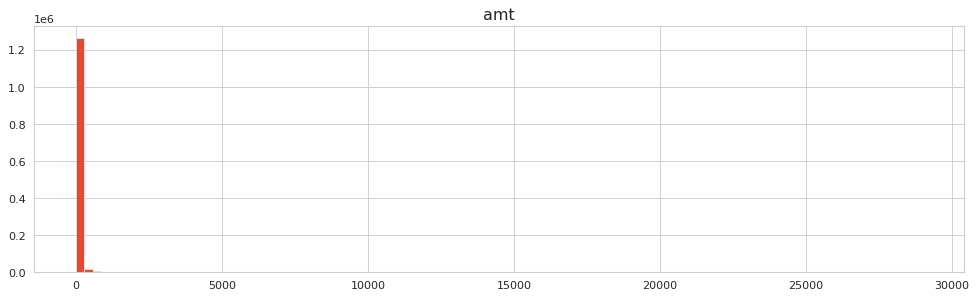

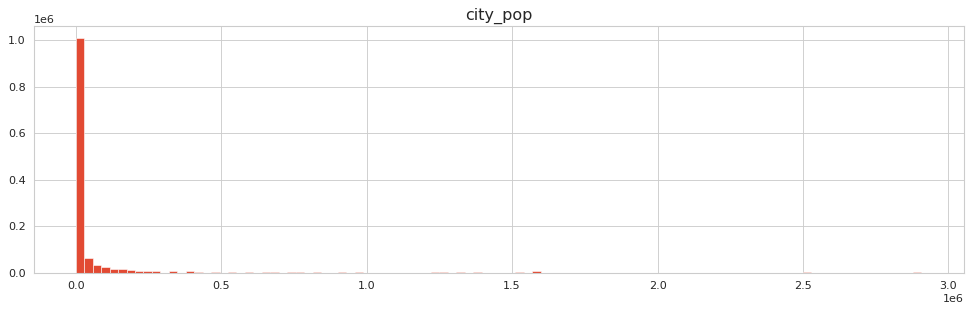

In [ ]:
for x in columnsNumeric:
  plt.figure(figsize=(15,4), dpi=80)
  plt.title(df[x].name)
  plt.hist(df[x],bins=100)
  plt.show()

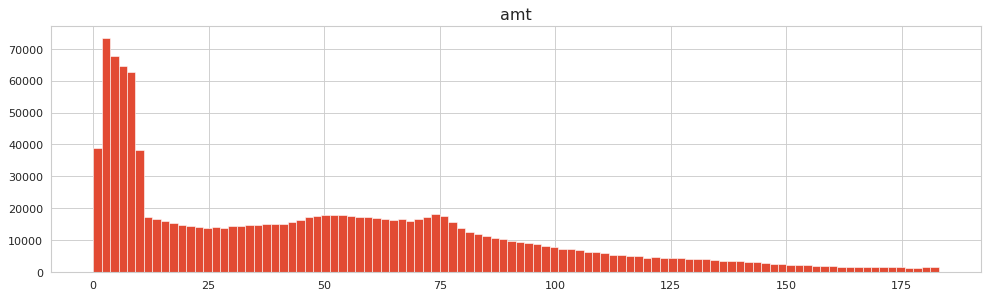

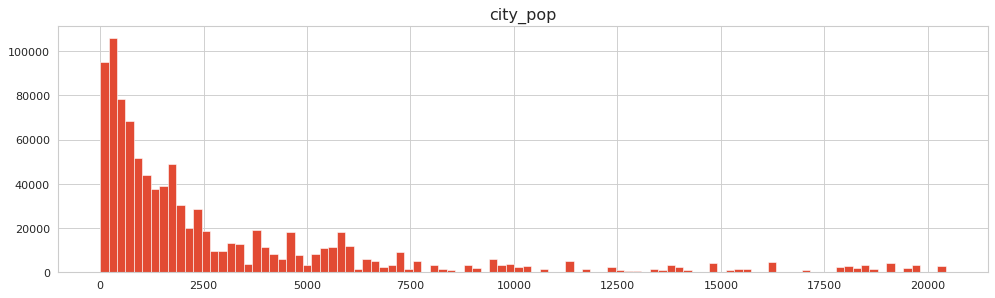

In [ ]:
# No consideramos las colas (outliers) para ver mejor la distribucion
for x in columnsNumeric:
  plt.figure(figsize=(15,4), dpi=80)
  Q03= int(df[x].quantile(0.75))+100
  plt.title(df[x].name)
  plt.hist(df[x],bins=100,range=(0,Q03))
  plt.show()

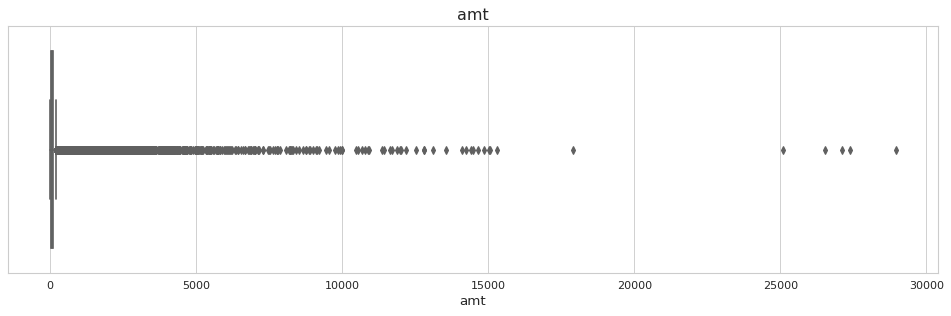

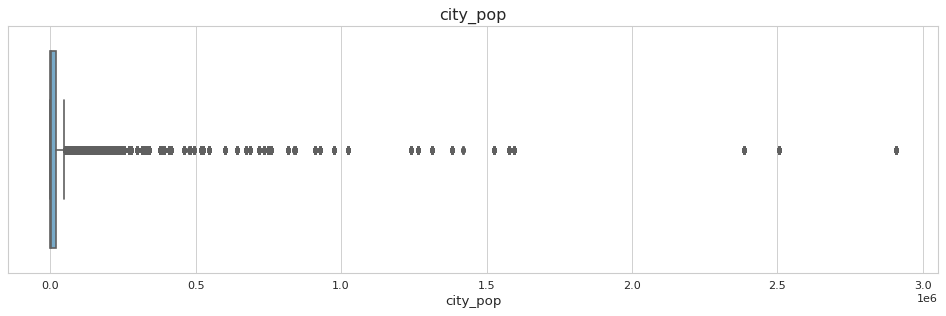

In [ ]:
# Grafico de Cajas para revision de atipicos
for x in columnsNumeric:
  plt.figure(figsize=(15,4), dpi=80)
  plt.title(df[x].name)
  sns.boxplot(x=df[x], palette="Blues")
  plt.show()

## Anlisis Bivariado

### Categoricas

In [ ]:
columnsString

['category', 'gender', 'city', 'state', 'is_fraud']

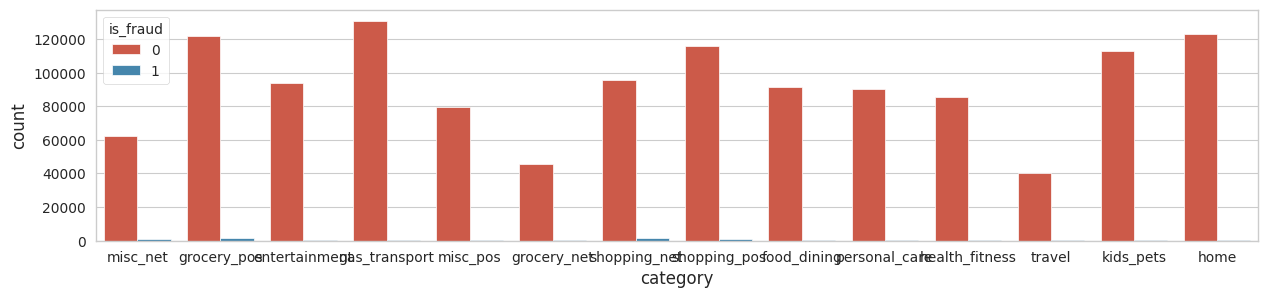

In [ ]:
# category

plt.figure(figsize=(15,3))
sns.countplot(x='category', hue='is_fraud', data=df);

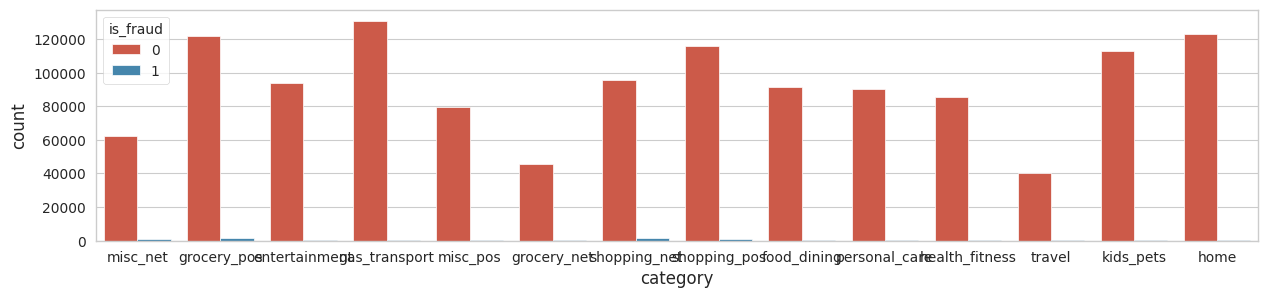

In [ ]:
# category

plt.figure(figsize=(15,3))
sns.countplot(x='category', hue='is_fraud', data=df);

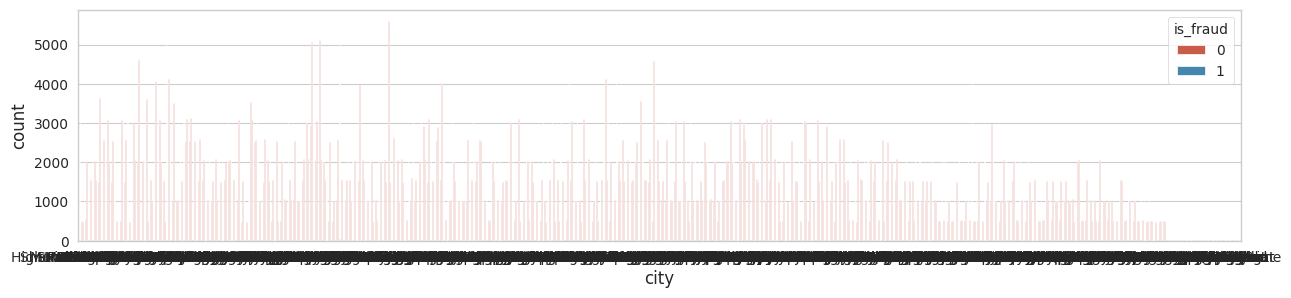

In [ ]:
# city

plt.figure(figsize=(15,3))
sns.countplot(x='city', hue='is_fraud', data=df);

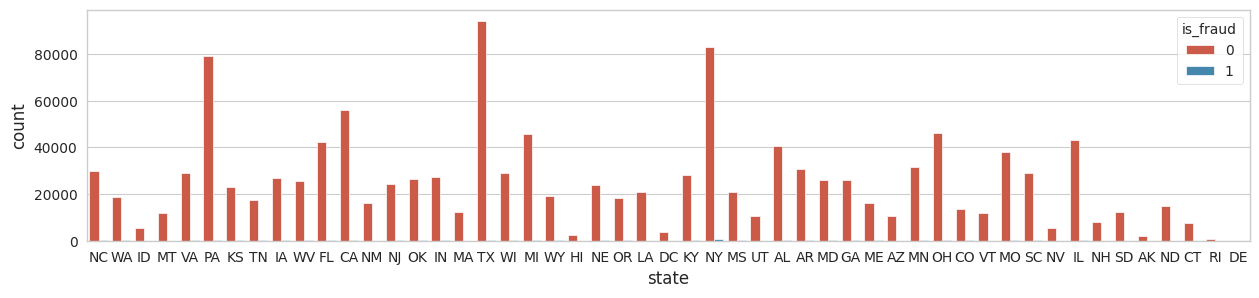

In [ ]:
# state

plt.figure(figsize=(15,3))
sns.countplot(x='state', hue='is_fraud', data=df);

### Numericas

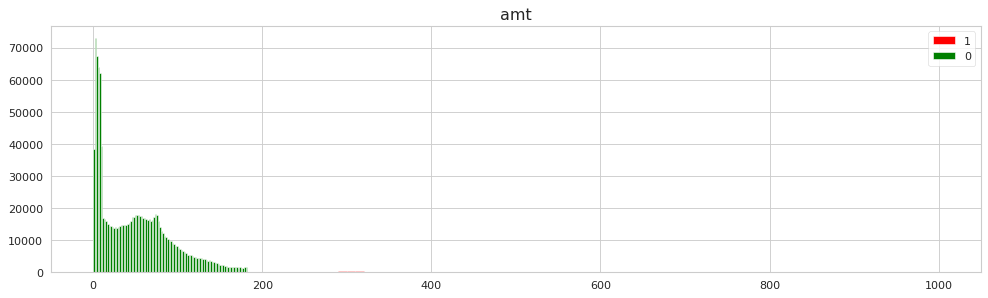

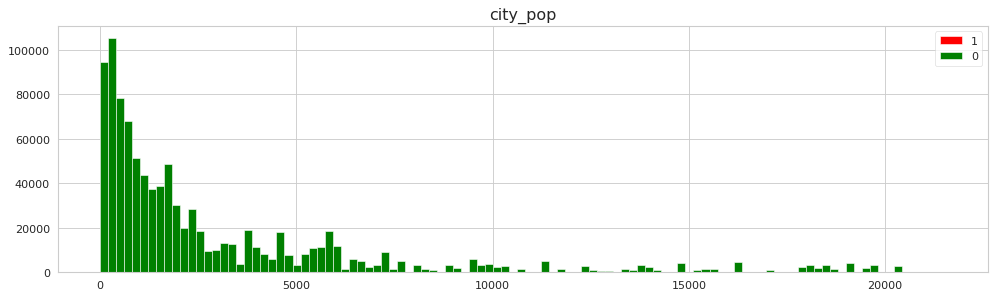

In [ ]:
# Analizando variables numericas con respecto al target
for x in columnsNumeric:
  plt.figure(figsize=(15,4), dpi=80)
  x1 = df.loc[df['is_fraud']==1,x]  #Serie
  x2 = df.loc[df['is_fraud']==0,x]  #serie

  Q03x1 = int(pd.DataFrame(x1)[x].quantile(0.75))+100  # Q3 de la serie
  Q03x2 = int(pd.DataFrame(x2)[x].quantile(0.75))+100  # Q3 de la serie

  #se muestran las densidades
  plt.title(df[x].name)
  plt.hist(x1,bins=100,color='r',range=(0,Q03x1),label=1)
  plt.hist(x2,bins=100,color='g',range=(0,Q03x2),label=0)
  plt.legend()
  plt.show()

In [ ]:
!pip install plotly

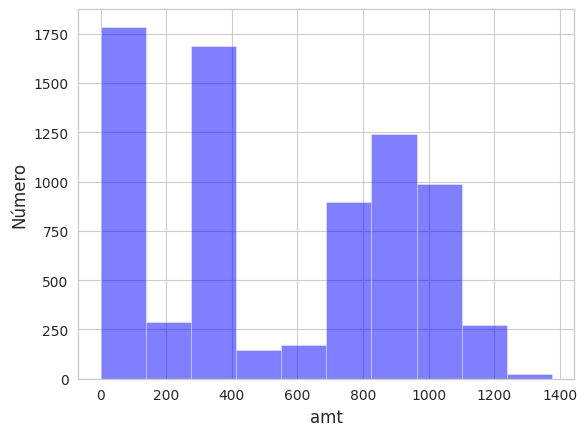

In [ ]:
num_bins = 10
data_0 = df[df.is_fraud == 1]

for i in columnsNumeric:
    n, bins, patches = plt.hist(data_0[i], num_bins, facecolor='blue', alpha=0.5)
    plt.xlabel(i)
    plt.ylabel('Número')
    plt.show()

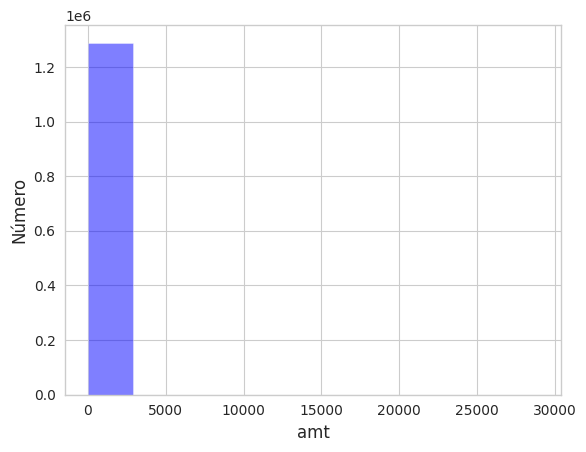

In [ ]:
num_bins = 10
data_0 = df[df.is_fraud == 0]

for i in columnsNumeric:
    n, bins, patches = plt.hist(data_0[i], num_bins, facecolor='blue', alpha=0.5)
    plt.xlabel(i)
    plt.ylabel('Número')
    plt.show()

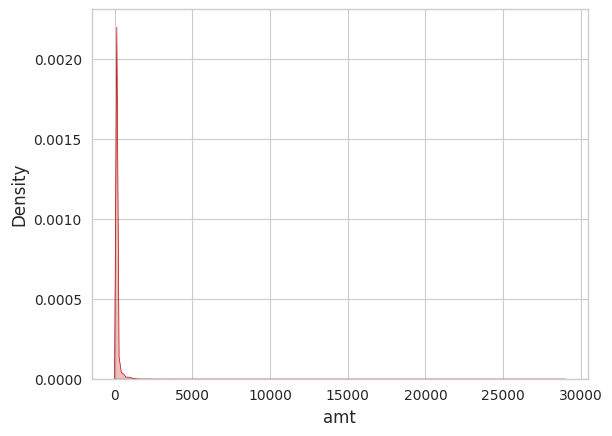

In [ ]:
data_0 = df
for i in columnsNumeric:
    sns.kdeplot(data_0[i],shade = True,vertical = False,kernel = 'gau',cumulative = False,color = "#BB0000")
    plt.show()

In [ ]:
from plotly.offline import download_plotlyjs, plot, iplot
from plotly.graph_objs import *

In [ ]:
# gender de los que NO aceptan la campaña
geom_we = Histogram(x = df.query('is_fraud == 0')['gender'],
               marker = {'color': '#5555FF',
                         'line': {'color': '#FFFFFF',
                                  'width': 1},
                         'opacity': 0.6},
                   name = 'No Aceptan')

# gender de los que SI aceptan la campaña
geom_ee = Histogram(x = df.query('is_fraud == 1')['gender'],
               marker = {'color': '#55FF55',
                         'line': {'color': '#FFFFFF',
                                  'width': 1},
                         'opacity': 0.6},
                   name = 'Aceptan')

lay = Layout(
    title = 'gender No Aceptan vs gender Aceptan',
    barmode = 'overlay'
)

fig = Figure(data = [geom_we, geom_ee], layout = lay)

iplot(fig)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Consumo Promedio Mensual de los que NO aceptan la campaña
geom_we = Histogram(x = df.query('is_fraud == 0')['category'],
               marker = {'color': '#5555FF',
                         'line': {'color': '#FFFFFF',
                                  'width': 1},
                         'opacity': 0.6},
                   name = 'No Aceptan')

# Consumo Promedio Mensual de los que SI aceptan la campaña
geom_ee = Histogram(x = df.query('is_fraud == 1')['category'],
               marker = {'color': '#55FF55',
                         'line': {'color': '#FFFFFF',
                                  'width': 1},
                         'opacity': 0.6},
                   name = 'Aceptan')

lay = Layout(
    title = 'category No Aceptan vs category Aceptan',
    barmode = 'overlay'
)

fig = Figure(data = [geom_we, geom_ee], layout = lay)

iplot(fig)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
df_prub = df.copy()
df_prub['TARGET_LB'] = np.where(df_prub['is_fraud']==0,'N','Y')

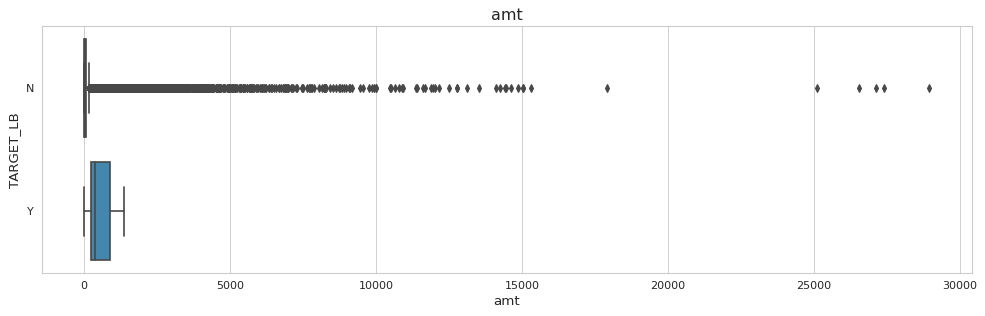

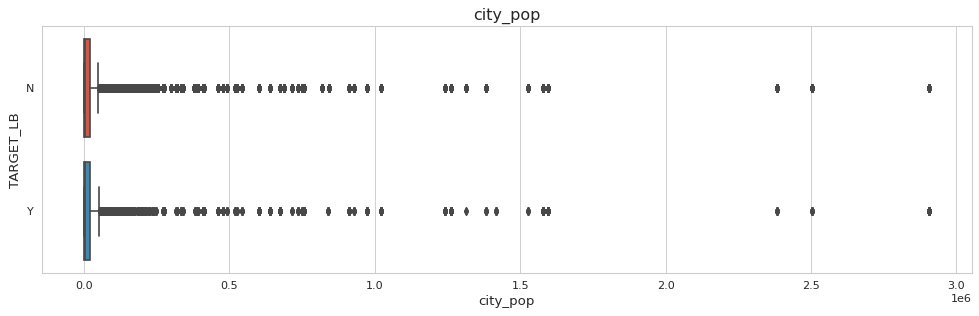

In [ ]:
# Grafico de cajas respecto al target
for x in columnsNumeric:
  plt.figure(figsize=(15,4), dpi=80)
  plt.title(df_prub[x].name)
  sns.boxplot(x=df_prub[x],y=df_prub['TARGET_LB'])
  plt.show()

## Analisis Multivariado

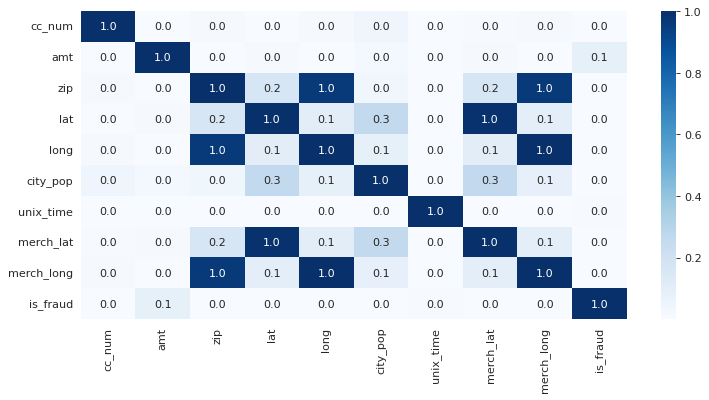

In [ ]:
# Analizamos la correlacion de las variables
# Spearman: Para variables numericas. No asume normalidad
plt.figure(figsize=(11,5), dpi=80)
sns.heatmap(abs(df.corr(method='spearman')),annot=True,fmt='.1f',cmap='Blues')
plt.show()

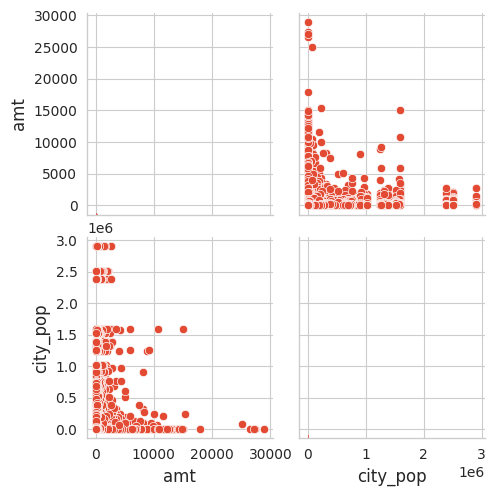

In [ ]:
sns.pairplot(df[columnsNumeric])

## Asimetria

Calculamos el Coeficiente de Asimetría

In [ ]:
from scipy import stats
import pandas as pd


data_ca = {'Variable' : columnsNumeric,
       'Coeficiente_Asim' : stats.skew(df[columnsNumeric])}
asim = pd.DataFrame(data_ca)
asim

,Variable,Coeficiente_Asim
0,amt,42.277825
1,city_pop,5.593847


## Tratamiento de Nulos

In [ ]:
df.isnull().sum().sort_values(ascending=False)

trans_date_trans_time    0
cc_num                   0
merch_long               0
merch_lat                0
unix_time                0
trans_num                0
dob                      0
job                      0
city_pop                 0
long                     0
lat                      0
zip                      0
state                    0
city                     0
street                   0
gender                   0
last                     0
first                    0
amt                      0
category                 0
merchant                 0
is_fraud                 0
dtype: int64

In [ ]:
df.isnull().sum()/df.shape[0]*100

trans_date_trans_time    0.0
cc_num                   0.0
merchant                 0.0
category                 0.0
amt                      0.0
first                    0.0
last                     0.0
gender                   0.0
street                   0.0
city                     0.0
state                    0.0
zip                      0.0
lat                      0.0
long                     0.0
city_pop                 0.0
job                      0.0
dob                      0.0
trans_num                0.0
unix_time                0.0
merch_lat                0.0
merch_long               0.0
is_fraud                 0.0
dtype: float64

# **II. Recodificacion Data**

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
for i in columnsString:
    print(i)
    le = LabelEncoder()
    le.fit(df[str(i)])
    df[str(i)]=le.transform(df[str(i)])

category
gender
city
state
is_fraud


In [ ]:
print(df.shape)
df.head(3)

(1296675, 22)


,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",8,4.97,Jennifer,Banks,0,561 Perry Cove,526,27,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",4,107.23,Stephanie,Gill,0,43039 Riley Greens Suite 393,612,47,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,0,220.11,Edward,Sanchez,1,594 White Dale Suite 530,468,13,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0


## Estandarizacion

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(np.array(df.city_pop).reshape(-1,1))
df['city_pop_norm'] = pd.DataFrame(x_scaled)

# **III. Ingenieria de Variables**

In [ ]:
df['edad'] = 2023-df.dob.astype(str).str[:4].astype(int)

In [ ]:
import math

In [ ]:
def distance(lat1, lon1, lat2, lon2):
    R = 6373
    lat1 = math.radians(lat1)
    lon1 = math.radians(lon1)
    lat2 = math.radians(lat2)
    lon2 = math.radians(lon2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

    return R * c

In [ ]:
df['distance'] = df.apply(lambda row: distance(row['lat'], row['long'], row['merch_lat'], row['merch_long']), axis=1)

In [ ]:
df.groupby(['first', 'last']).size()

first    last    
Aaron    Murray      2050
         Pena        1476
         Rogers       508
         Stewart      537
Adam     Keller       521
                     ... 
William  Thompson    2052
Willie   Jordan      1038
Xavier   Beltran     1516
Zachary  Allen       1523
         Boone        495
Length: 973, dtype: int64

Existen menos personas que los numeros de tarjeta de credito, por lo que podría indicar que una persona tiene 2 tarjetas de credito

In [ ]:
print('Numeros de TC: ',len(df.cc_num.unique()))
print('Numeros de merchant: ',len(df.merchant.unique()))

Numeros de TC:  983
Numeros de merchant:  693


# **IV. Modelado**

In [ ]:
X = df[['amt', 'zip', 'distance','unix_time', 'gender', 'state', 'edad', 'city_pop_norm']]
y = df['is_fraud']

## Particion Muestral

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
print('X_train shape', X_train.shape)
print('y_train shape', y_train.shape)
print('X_test shape', X_test.shape)
print('y_test shape', y_test.shape)

X_train shape (907672, 8)
y_train shape (907672,)
X_test shape (389003, 8)
y_test shape (389003,)


In [ ]:
# Distribucion real del target!
df.is_fraud.value_counts()/df.shape[0]*100

0    99.421135
1     0.578865
Name: is_fraud, dtype: float64

In [ ]:
# Distribucion del target de entrenamiento!
y_train.value_counts()/y_train.shape[0]*100

0    99.421157
1     0.578843
Name: is_fraud, dtype: float64

In [ ]:
# Distribucion del target de prueba!
y_test.value_counts()/y_test.shape[0]*100

0    99.421084
1     0.578916
Name: is_fraud, dtype: float64

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [ ]:
%%time
clf = RandomForestClassifier(n_estimators=100,
                             max_features = 'sqrt',
                             verbose=1,
                             n_jobs=-1)
clf.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  3.0min


CPU times: user 7min 16s, sys: 1.11 s, total: 7min 17s
Wall time: 5min 18s


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  5.3min finished


RandomForestClassifier(n_jobs=-1, verbose=1)

In [ ]:
y_pred_train =  clf.predict(X_train)
y_pred_test =  clf.predict(X_test)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    5.1s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:   13.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    3.1s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    5.8s finished


In [ ]:
# Matriz de confusion
print("Matriz confusion: Train")
cm_train = metrics.confusion_matrix(y_train,y_pred_train)
print(cm_train)

print("Matriz confusion: Test")
cm_test = metrics.confusion_matrix(y_test,y_pred_test)
print(cm_test)
print('\n')

# Accuracy
print("Accuracy: Train")
accuracy_train=metrics.accuracy_score(y_train,y_pred_train)
print(accuracy_train)

print("Accuracy: Test")
accuracy_test=metrics.accuracy_score(y_test,y_pred_test)
print(accuracy_test)
print('\n')

# Precision
print("Precision: Train")
precision_train=metrics.precision_score(y_train,y_pred_train)
print(precision_train)

print("Precision: Test")
precision_test=metrics.precision_score(y_test,y_pred_test)
print(precision_test)
print('\n')

# Recall
print("Recall: Train")
recall_train=metrics.recall_score(y_train,y_pred_train)
print(recall_train)

print("Recall: Test")
recall_test=metrics.recall_score(y_test,y_pred_test)
print(recall_test)

Matriz confusion: Train
[[902418      0]
 [     1   5253]]
Matriz confusion: Test
[[386545    206]
 [  1191   1061]]


Accuracy: Train
0.9999988982804361
Accuracy: Test
0.9964087680557734


Precision: Train
1.0
Precision: Test
0.8374112075769534


Recall: Train
0.9998096688237533
Recall: Test
0.47113676731793963


In [ ]:
print(metrics.classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    386751
           1       0.84      0.47      0.60      2252

    accuracy                           1.00    389003
   macro avg       0.92      0.74      0.80    389003
weighted avg       1.00      1.00      1.00    389003



In [ ]:
metrics.log_loss(y_test,y_pred_test)

0.12944111943763092

AUC

In [ ]:
probs = clf.predict_proba(X_test)[:, 1]

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    2.3s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    5.5s finished


In [ ]:
roc = metrics.roc_auc_score(y_test, probs)
roc

0.9870654554320967

In [ ]:
gini = 2 * roc - 1
gini

0.9741309108641933

In [ ]:
logloss_score = metrics.log_loss(y_test, probs)
logloss_score

0.0134358778267583

Punto de corte

In [ ]:
def Find_Optimal_Cutoff(target, predicted):

    fpr, tpr, threshold = metrics.roc_curve(target, predicted)
    i = np.arange(len(tpr))
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.iloc[(roc.tf-0).abs().argsort()[:1]]

    return list(roc_t['threshold'])

In [ ]:
Find_Optimal_Cutoff(y_test, probs)

[0.02]

In [ ]:
numeric = np.where(probs > 0.02, 1, 0)
metrics.f1_score(y_test, numeric)

0.3147215639810427

In [ ]:
def f1_score_iter(y_test, y_pred):
    axis_x = []
    axis_y = []

    for i in np.arange(0.1, 0.9, 0.05):

        numeric = np.where(y_pred > i, 1, 0)

        f1 = metrics.f1_score(y_test, numeric)

        axis_x.append(i)
        axis_y.append(f1)

        print("Cutoff: {:.2f} - F1 score: {:.4f}".format(i, f1))


    plt.figure(figsize=(8,8))
    plt.plot(axis_x, axis_y)
    plt.grid()
    plt.show()

Cutoff: 0.10 - F1 score: 0.5598
Cutoff: 0.15 - F1 score: 0.6176
Cutoff: 0.20 - F1 score: 0.6445
Cutoff: 0.25 - F1 score: 0.6605
Cutoff: 0.30 - F1 score: 0.6604
Cutoff: 0.35 - F1 score: 0.6544
Cutoff: 0.40 - F1 score: 0.6405
Cutoff: 0.45 - F1 score: 0.6226
Cutoff: 0.50 - F1 score: 0.6030
Cutoff: 0.55 - F1 score: 0.5788
Cutoff: 0.60 - F1 score: 0.5338
Cutoff: 0.65 - F1 score: 0.4829
Cutoff: 0.70 - F1 score: 0.4189
Cutoff: 0.75 - F1 score: 0.3569
Cutoff: 0.80 - F1 score: 0.2853
Cutoff: 0.85 - F1 score: 0.2061


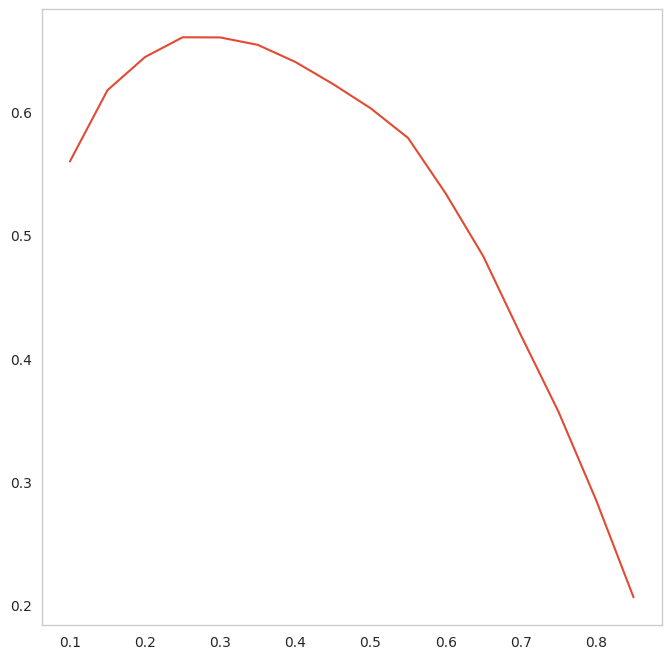

In [ ]:
f1_score_iter(y_test, probs)

In [ ]:
numeric = np.where(probs > 0.3, 1, 0)
metrics.f1_score(y_test, numeric)

0.6604161902584038

## LGBM

In [ ]:
import lightgbm as lgb

In [ ]:
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test)

In [ ]:
parameters = {
    'application': 'binary',
    'objective': 'binary',
    'metric': 'f1',
    'is_unbalance': 'true',
    'boosting': 'gbdt',
    'num_leaves': 31,
    'feature_fraction': 0.5,
    'bagging_fraction': 0.5,
    'bagging_freq': 20,
    'learning_rate': 0.05,
    'verbose': 0
}

In [ ]:
def lgb_f1_score(y_hat, data):
    y_true = data.get_label()
    y_hat = np.round(y_hat)
    return 'f1', metrics.f1_score(y_true, y_hat), True

In [ ]:
evals_result = {}

In [ ]:
%%time
model = lgb.train(parameters,
                  train_data,
                  valid_sets=test_data,
                  num_boost_round=2000,
                  #early_stopping_rounds=100,
                  feval=lgb_f1_score)

CPU times: user 16min 23s, sys: 1.82 s, total: 16min 25s
Wall time: 13min 25s


In [ ]:
y_pred_train =  model.predict(X_train)
y_pred_test =  model.predict(X_test)

In [ ]:
y_pred_train

array([8.77355508e-03, 4.20677801e-03, 5.23547155e-03, ...,
       6.16412530e-05, 3.04228468e-05, 6.05942565e-05])

In [ ]:
y_pred_test

array([1.23035761e-05, 3.24181214e-04, 1.66181075e-04, ...,
       7.25296182e-07, 8.31355030e-05, 8.81844642e-06])

In [ ]:
metrics.log_loss(y_test,y_pred_test)

0.043184795214378596

In [ ]:
probs = model.predict(X_test)

In [ ]:
roc = metrics.roc_auc_score(y_test, probs)
roc

0.9859086109869535

In [ ]:
gini = 2 * roc - 1
gini

0.971817221973907

In [ ]:
logloss_score = metrics.log_loss(y_test, probs)
logloss_score

0.043184795214378596

In [ ]:
Find_Optimal_Cutoff(y_test, probs)

[0.0783212803469803]

Cutoff: 0.10 - F1 score: 0.1605
Cutoff: 0.15 - F1 score: 0.1961
Cutoff: 0.20 - F1 score: 0.2287
Cutoff: 0.25 - F1 score: 0.2572
Cutoff: 0.30 - F1 score: 0.2839
Cutoff: 0.35 - F1 score: 0.3105
Cutoff: 0.40 - F1 score: 0.3364
Cutoff: 0.45 - F1 score: 0.3617
Cutoff: 0.50 - F1 score: 0.3896
Cutoff: 0.55 - F1 score: 0.4160
Cutoff: 0.60 - F1 score: 0.4402
Cutoff: 0.65 - F1 score: 0.4673
Cutoff: 0.70 - F1 score: 0.4954
Cutoff: 0.75 - F1 score: 0.5259
Cutoff: 0.80 - F1 score: 0.5554
Cutoff: 0.85 - F1 score: 0.5922


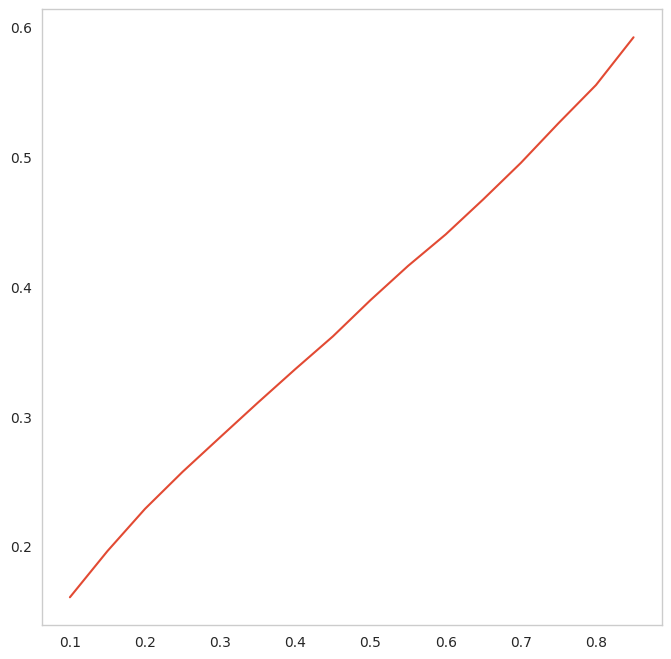

In [ ]:
f1_score_iter(y_test, probs)

In [ ]:
numeric = np.where(probs > 0.25, 1, 0)
metrics.f1_score(y_test, numeric)

0.2572215461474412

### Importancia

In [ ]:
imp_variables = pd.DataFrame(sorted(zip(model.feature_importance(),X.columns)), columns=['Importancia','Variable'])
imp_variables

,Importancia,Variable
0,1120,gender
1,3674,state
2,5868,zip
3,7121,unix_time
4,8938,city_pop_norm
5,9291,amt
6,10508,edad
7,13480,distance


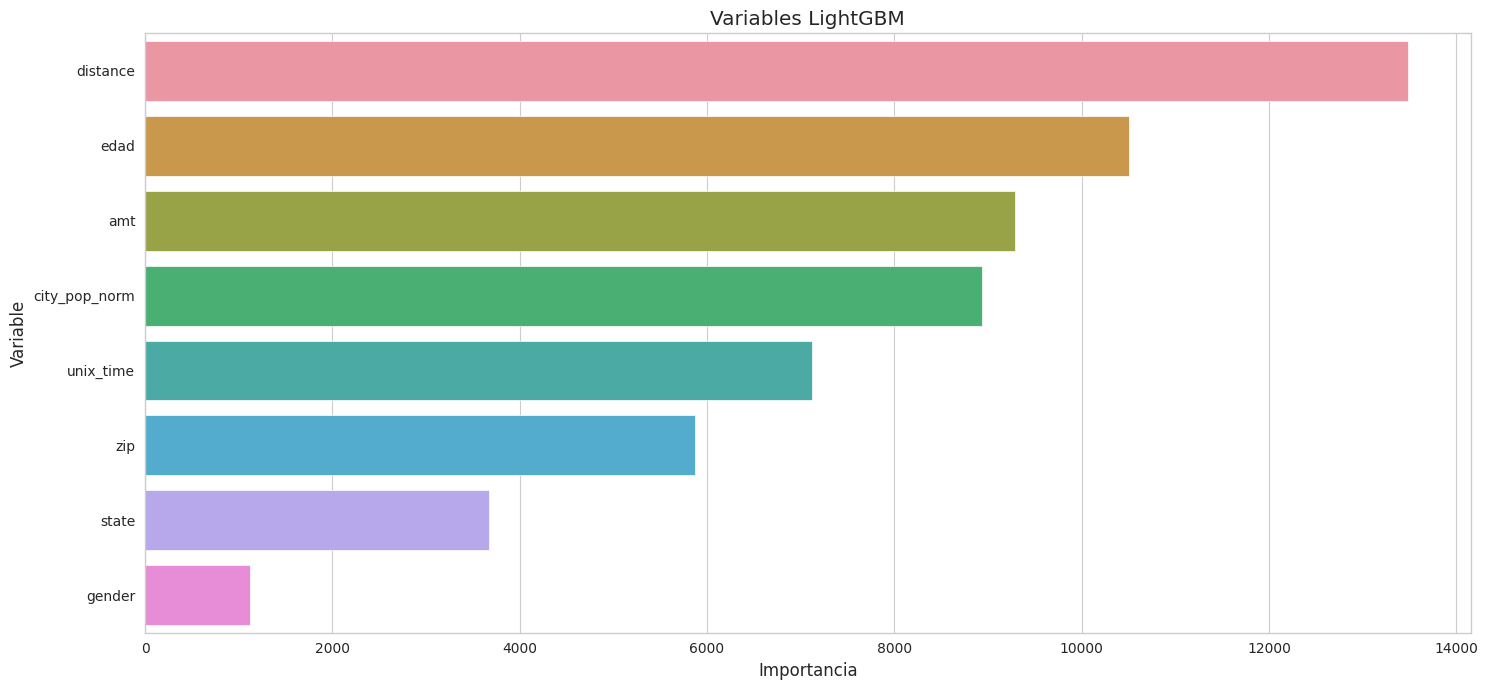

In [ ]:
plt.figure(figsize=(15, 7))
sns.barplot(x="Importancia", y="Variable", data=imp_variables.sort_values(by="Importancia", ascending=False))
plt.title('Variables LightGBM')
plt.tight_layout()
plt.show()